In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

### Laboratorio 09 - Carga específica (e/m) del electrón (Antiguo)
#### Laboratoria de Física Moderna 

Código hecho por: Sara Valentina Guerrero Espinosa

In [2]:
# Traemos los datos desde Excel

# Para graficar V vs I^2
info_1 = [pd.read_excel('Datos_Lab09.xlsx',sheet_name='n1'),
          pd.read_excel('Datos_Lab09.xlsx',sheet_name='n2'), 
          pd.read_excel('Datos_Lab09.xlsx',sheet_name='n3')]

# Para graficar V vs I^2
info_2 = []
i = 300
while i < 601:
    info_2.append(pd.read_excel('Datos_Lab09.xlsx',sheet_name=str(i)))
    i += 50

In [3]:
# Regresión lineal 
def Get_LinRegr(x, y):
    x = x.reshape((-1,1)) 
    regr = LinearRegression()
    regr.fit(x,y)

    b, m = regr.intercept_, regr.coef_

    y_predict = regr.predict(x)
    
    return m[0], b, y_predict


# Bootstraping
def GetParametres(x, y, data):
     
    # Tomamos una muestra aleatoria
    muestra = random.choices(data, k=7)    
    
    # Separamos la información de la muestra
    x_m, y_m = [], []
    
    for i in range(len(muestra)):
        x_m.append(muestra[i][0])
        y_m.append(muestra[i][1])
    
    # Hallamos los parámetros
    m, b, y_prueba = Get_LinRegr(np.array(x_m), np.array(y_m))
    
    return m, b, y_prueba

def GetSample(x, y, data):
    m_ = []
    b_ = []
    y_prueba_ = []
    
    for i in range(1000):
        m, b, y_prueba = GetParametres(x, y, data)
        m_.append(m)
        b_.append(b)
        y_prueba_.append(y_prueba)
        
    return m_, b_, y_prueba_


# Definimos la función de error para las incertidumbres:
def error(x, y, data):
    
    m_ , b_, y_ = GetSample(x, y, data)
    
    # Para m:
    mu_m, sigma_m = norm.fit( m_ )
    
    # Para b:
    mu_b, sigma_b = norm.fit( b_ )
    
    # Para y_prueba:
    mu_y, sigma_y = norm.fit( y_ )
    
    return mu_m, sigma_m, mu_b, sigma_b, mu_y, sigma_y  

def GetAll(X, Y):

    # Juntamos la información agrupando cada x con su y
    data = []

    for i in range(len(X)):
        data.append([X[i],Y[i]])
        
    mu_m, sigma_m, mu_b, sigma_b, mu_y, sigma_y  = error(X, Y, data)
    
    return mu_m, sigma_m, mu_b, sigma_b, mu_y, sigma_y  

def Graf01(info_1 = info_1):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)


    for i in range(len(info_1)):
        X, Y = np.array(info_1[i]['V']), np.array(info_1[i]['I^2'])

        mu_m, sigma_m, mu_b, sigma_b, mu_y, sigma_y = GetAll(X, Y)

        f = np.poly1d(np.array([mu_m, mu_b]))

        ax.scatter(X, Y, s = 10 )
        ax.plot(X, f(X), label=f'(n = {i}) $I^2 ={mu_m:.3f} (V) + {mu_b:.3f}$')
        print(f'Para n = {i}, inc_m = {sigma_m} - inc_b = {sigma_b}')

    # Grafica

    plt.title('$V$ vs $I^2$', fontsize=15)
    ax.set_xlabel(r'V (V)', fontsize=12)
    ax.set_ylabel(r'$I^2$ (A)', fontsize=12)

    ax.legend(loc='upper right')

    fig.savefig('V_vs_I2.png', dpi=300, bbox_inches='tight')
    
    return None

def Graf02(info_1 = info_2):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    
    j = 300


    for i in range(len(info_1)):
        X, Y = np.array(info_1[i]['n']), np.array(info_1[i]['I'])

        mu_m, sigma_m, mu_b, sigma_b, mu_y, sigma_y = GetAll(X, Y)

        f = np.poly1d(np.array([mu_m, mu_b]))

        ax.scatter(X, Y, s = 10 )
        ax.plot(X, f(X), label=f'(V = {j}) $I ={mu_m:.2f} (n) + {mu_b:.2f}$')
        print(f'Para V = {j}, inc_m = {round(sigma_m,3)} - inc_b = {round(sigma_b,3)}')
        
        j += 50
        

    # Grafica

    plt.title('$I$ vs $n$', fontsize=15)
    ax.set_xlabel(r'n', fontsize=12)
    ax.set_ylabel(r'$I$ (A)', fontsize=12)

    ax.legend(loc='lower right')

    fig.savefig('I_vs_n.png', dpi=300, bbox_inches='tight')
    
    return None

Para n = 0, inc_m = 0.00018544210636481771 - inc_b = 0.07563110242374235
Para n = 1, inc_m = 0.0003543578470158055 - inc_b = 0.16170103760642243
Para n = 2, inc_m = 0.0006660297172066733 - inc_b = 0.23313574097185935


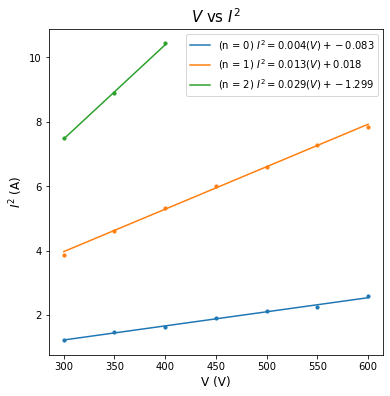

In [4]:
Graf01()

Para V = 300, inc_m = 0.051 - inc_b = 0.09
Para V = 350, inc_m = 0.054 - inc_b = 0.1
Para V = 400, inc_m = 0.05 - inc_b = 0.092
Para V = 450, inc_m = 0.079 - inc_b = 0.084
Para V = 500, inc_m = 0.104 - inc_b = 0.158
Para V = 550, inc_m = 0.09 - inc_b = 0.116
Para V = 600, inc_m = 0.088 - inc_b = 0.096


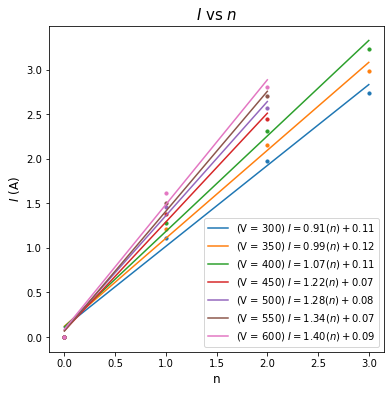

In [5]:
Graf02()